In [225]:
#Importing dataset into python
import pandas as pd
#df = pd.read_excel(r'E:\Numpy_Ninja\Tableau\Python_Hackathon\HospitalDatabase.xlsx')
xl = pd.ExcelFile(r'E:\Numpy_Ninja\Tableau\Python_Hackathon\HospitalDatabase.xlsx')
sheets = xl.sheet_names
for i, sheet in enumerate(sheets):
    globals()['df'+ str(i+1)] = pd.read_excel(r'E:\Numpy_Ninja\Tableau\Python_Hackathon\HospitalDatabase.xlsx', sheet_name = sheet)
print(df1)#Patients
print(df2)#EDVisits
print(df3)#AmbulatoryVisits
print(df4)#ReadmissionRegistry
print(df5)#Discharges
print(df6)#Providers
print(df7)#EDUnique

     PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  
0                     White  English  
1                     White  English  
2                     White  English  
3              

In [224]:
#21. Which reason of visit has maximum mortality rate?
#-----------------------------------------------------------------------------------------------------------------------------

df3.rename(columns={'PatientMRN': 'PatientID'})
result = pd.concat([df3,df5],axis = 1, join = 'inner')
print("The visit type with highest mortality is: \n", result.groupby('VisitType')['ExpectedMortality'].mean().reset_index().sort_values(['ExpectedMortality'],ascending = False).head(n=1))


The visit type with highest mortality is: 
    VisitType  ExpectedMortality
0  Follow Up           0.349145


In [226]:
#22. Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).
#-----------------------------------------------------------------------------------------------------------------------------

df4['LOS'] = (df4['DischargeDate'] - df4['AdmissionDate']).dt.total_seconds() / 60 / 60 / 24
result = df4.groupby(['DischargeDisposition','Service'])['LOS'].mean()
print(result)


DischargeDisposition  Service         
Expired               Cardiology           9.357828
                      General Medicine     8.972359
                      Hospitalist         10.587996
                      ICU                  9.790686
                      Neurology           10.650761
                      Orthopeadics        12.327644
Home                  Cardiology          10.633869
                      General Medicine    10.298306
                      Hospitalist          9.522124
                      ICU                  9.575618
                      Neurology            9.677446
                      Orthopeadics         9.325017
Transfer              Cardiology          11.759865
                      General Medicine    11.075935
                      Hospitalist          9.248801
                      ICU                  9.479894
                      Neurology           12.261288
                      Orthopeadics        16.559908
Name: LOS, dtype: float64

In [227]:
#23. Add column 'Age' in Patient table.
#-----------------------------------------------------------------------------------------------------------------------------

from datetime import date, datetime
# This function converts given date to age
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
 
df1['Age'] = df1['DateOfBirth'].apply(age)
df1


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,47
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,40
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59


In [228]:
#24. Using arrays and loops, find the count of patients based on gender.
#-----------------------------------------------------------------------------------------------------------------------------

male = 0
female = 0
for gender in df1['Gender']:
    if gender == 'Male':
        male+= 1
    else:
        female+=1
print('Count of Male patients: {} and Count of Female patients: {}'.format(male, female))


Count of Male patients: 537 and Count of Female patients: 408


#25. Create bins to segregate Patients with 'Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension'.

The following is the recommendation of the American Heart Association and will be considered for the purpose of this question.

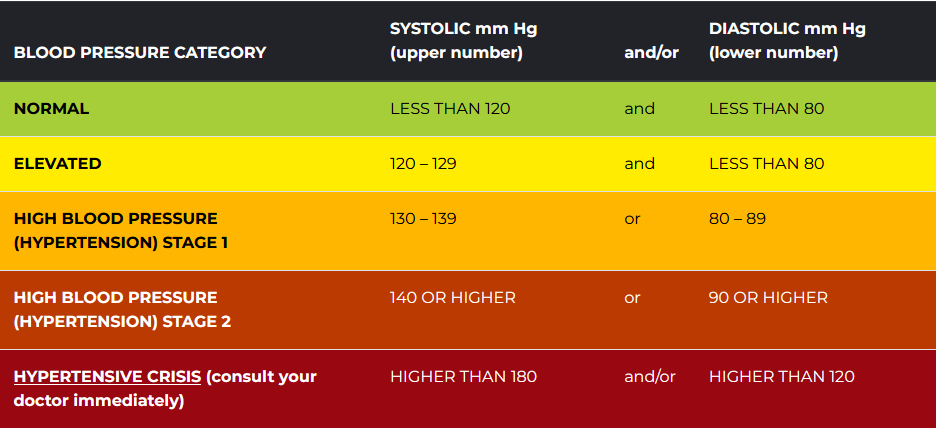

Mild Hypertension : SBP is (120 to 129) and DBP < 80
Moderate Hypertension : SBP is (130 to 139) or DBP is (80 to 89)
High Hypertension : SBP >= 140 or DBP >= 90
Severe Hypertension : SBP > 180 and/or DBP > 120

In [229]:
#25. 
#-----------------------------------------------------------------------------------------------------------------------------

bpp = df3[(df3['BloodPressureSystolic']>120) & (df3['BloodPressureDiastolic'] > 50)]

#Funtion to define the blood pressure ranges:
def bp_range(sbp, dbp):
    if (119<sbp<130) and dbp < 80:
        return 'Mild'
    if (129<sbp<140) or (79< dbp < 90):
        return 'Moderate'
    if (139<sbp>180) or (90 < dbp < 120):
        return 'High'
    if sbp>180 or dbp > 120:
        return 'Severe'

#Add a column with stages for the BP ranges
bpp['Hypertension_Stages'] = bpp.apply(lambda x: bp_range(x['BloodPressureSystolic'], x['BloodPressureDiastolic']), axis =1)
bpp


C:\Users\Devina\AppData\Local\Temp\ipykernel_14456\2601444561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpp['Hypertension_Stages'] = bpp.apply(lambda x: bp_range(x['BloodPressureSystolic'], x['BloodPressureDiastolic']), axis =1)


,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus,Hypertension_Stages
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show,High
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show,High
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show,Moderate
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show,Moderate
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
945,788,873,1,2019-03-27,2019-03-10 17:19:48.264,5,Telemedicine,187.0,126.695141,70.049167,Canceled,High
946,703,855,36,2019-03-12,2019-02-19 02:27:52.664,10,Follow Up,182.0,140.703502,73.380812,Canceled,High
947,481,865,13,2019-05-03,2019-04-25 13:37:57.501,12,New,150.0,84.841197,61.625454,Canceled,Moderate
948,398,635,10,2019-02-09,2019-02-08 11:40:35.137,1,Physical,177.0,125.037534,53.287036,Canceled,Severe


<Axes: ylabel='Density'>

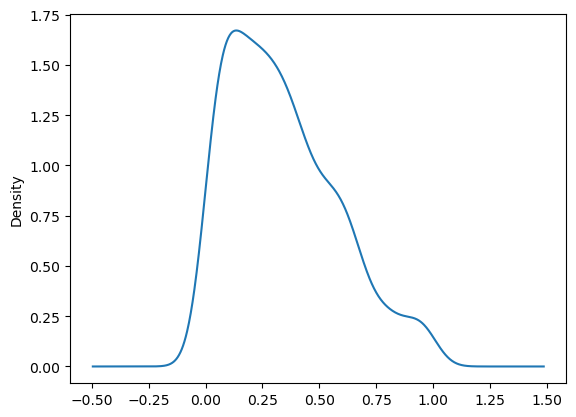

In [230]:
#26. Plot a graph to show the distribution of expected mortality.
#-----------------------------------------------------------------------------------------------------------------------------

df5['ExpectedMortality'].plot(kind='kde')


In [191]:
#27. Which departmentID has maximum number of visits scheduled.
#-----------------------------------------------------------------------------------------------------------------------------

df3[['VisitDepartmentID', 'VisitType']].groupby('VisitDepartmentID').count().reset_index(names='DepartmentID with maximum number of visits scheduled').sort_values(['VisitType'], ascending=False).head(1)



,DepartmentID with maximum number of visits scheduled,VisitType
10,11,102


In [241]:
#28. Find the visit type with maximum 'No Show'
#-----------------------------------------------------------------------------------------------------------------------------

visit_type_result = df3.loc[df3['VisitStatus'] == 'No Show'].groupby(['VisitType']).count().reset_index().sort_values(['VisitType'], ascending= False).head(1)
visit_type_result['VisitType']


2    Telemedicine
Name: VisitType, dtype: object

In [232]:
#29. Which demographic patients are prone to get Stroke?
#-----------------------------------------------------------------------------------------------------------------------------

df1[df1['PatientID'].isin(df5[df5['PrimaryDiagnosis'] == 'Stroke']['PatientID'])][['PatientID','Gender','Race','Language']]


,PatientID,Gender,Race,Language
9,10,Male,White,English
13,14,Male,White,Spanish
18,19,Male,White,Spanish
29,30,Female,White,Spanish
34,35,Female,White,Spanish
...,...,...,...,...
600,601,Male,Black/African-American,English
601,602,Male,Black/African-American,English
610,611,Male,Black/African-American,English
641,642,Female,Black/African-American,English


In [231]:
#30. Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.
#-----------------------------------------------------------------------------------------------------------------------------

df6.loc[(11 < df6['ProviderID']) & (df6['ProviderID'] < 20) & (df6['ProviderSpecialty'] == 'Surgery')]


,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


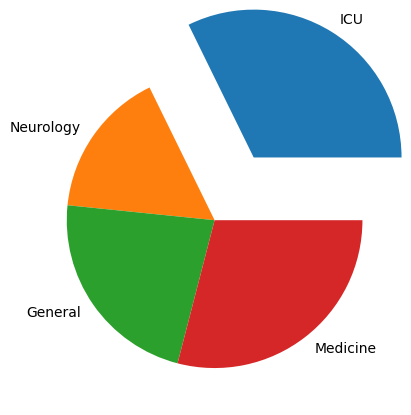

In [242]:
#32. Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] 
# & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.
#-----------------------------------------------------------------------------------------------------------------------------

import matplotlib.pyplot as plt
y = np.array([10,5,7,9])
mylabels = ["ICU", "Neurology", "General", "Medicine"]
myexplode = [y.max()*0.05, 0, 0, 0]
plt.pie(y, labels = mylabels, explode = myexplode)
# show the plot
plt.show()


In [243]:
#31. If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.
#-----------------------------------------------------------------------------------------------------------------------------

sample = df1
sample['FirstName'].mask(df['Gender']=='Male',('Mr. '+sample['FirstName']), inplace = True)
sample['FirstName'].mask(df['Gender']=='Female',('Ms. '+sample['FirstName']), inplace = True)
sample


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Mr. Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63
1,2,Mr. Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37
2,3,Mr. Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,47
3,4,Mr. Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54
4,5,Mr. Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Mr. Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36
941,942,Mr. Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52
942,943,Mr. Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,40
943,944,Mr. Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59


<Axes: ylabel='Density'>

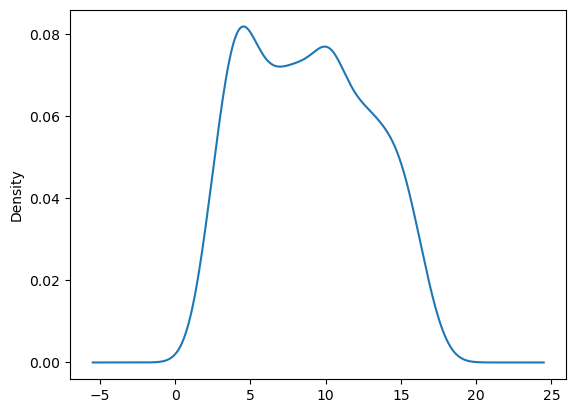

In [244]:
#33. Plot a graph to show the distribution of expected length of stay.
#-----------------------------------------------------------------------------------------------------------------------------

df4['ExpectedLOS'].plot(kind = 'kde')


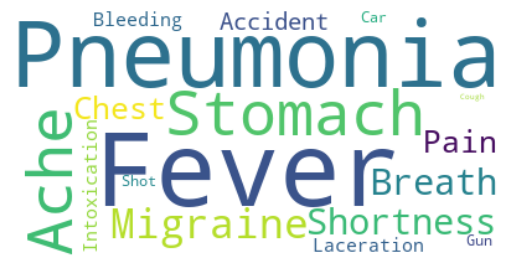

In [245]:
#34. Create a WordCloud Chart with Reason For Visit.
#-----------------------------------------------------------------------------------------------------------------------------

from wordcloud import WordCloud
text = " ".join(reason for reason in df2['ReasonForVisit'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [246]:
#35. np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30. 
#When the value is less than 6, print as -1,else print 99.
#-----------------------------------------------------------------------------------------------------------------------------

import numpy as np
   
a= np.arange(1,31).reshape(6,5)
print(a)
result_arr=np.concatenate((a[0:2:,3:], a[-2:6:,3:]),axis=0)
np.where(result_arr <6,-1,99)


[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


array([[-1, -1],
       [99, 99],
       [99, 99],
       [99, 99]])

In [247]:
#36. Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)
#-----------------------------------------------------------------------------------------------------------------------------

df3.loc[(df3['BloodPressureSystolic'] > 180) & (df3['BloodPressureDiastolic'] > 120)]


,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show
9,726,878,16,2019-04-04,2019-03-10 15:52:39.962,9,Telemedicine,183.0,122.982498,68.800091,No Show
38,506,890,15,2019-01-24,2019-01-21 05:07:43.641,10,Telemedicine,184.0,147.093192,71.160985,No Show
67,504,888,13,2019-01-22,2019-01-09 23:52:38.598,8,Telemedicine,185.0,154.745416,75.362150,No Show
70,509,893,2,2019-01-27,2019-01-26 05:11:07.934,5,Telemedicine,183.0,150.514924,78.979142,No Show
...,...,...,...,...,...,...,...,...,...,...,...
922,483,867,15,2019-01-01,2018-12-04 12:16:32.105,6,New,186.0,140.252935,88.801153,Canceled
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580,5,New,190.0,124.736359,69.731779,Canceled
942,392,617,4,2019-02-03,2019-02-01 02:50:08.377,7,Telemedicine,185.0,127.419321,84.645360,Canceled
945,788,873,1,2019-03-27,2019-03-10 17:19:48.264,5,Telemedicine,187.0,126.695141,70.049167,Canceled


In [248]:
#37. Display the data where actual LOS is greater than expected LOS.
#-----------------------------------------------------------------------------------------------------------------------------

df4.loc[(df4['ExpectedLOS'] < ((df4['DischargeDate']-df4['AdmissionDate']).dt.total_seconds() / 60 / 60 / 24))]


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,LOS
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0,3.895045
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0,3.936385
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,4.241029
10,568,12,2018-01-01,2018-01-09 09:21:47.300,Home,Hospitalist,Pneumonia,7.162811,0.671473,1.0,5.0,1.0,8.390131
11,107,13,2018-01-01,2018-01-09 21:34:42.467,Home,Hospitalist,Flu,4.554479,0.266584,1.0,5.0,1.0,8.899103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN,13.890394
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN,14.113411
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN,14.393963
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN,16.254306


In [249]:
#38. Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.
#-----------------------------------------------------------------------------------------------------------------------------

df1[['FirstName','LastName']].loc[101:200]


,FirstName,LastName
101,Mr. Gipsy,Frankton
102,Mr. Jethro,Wharin
103,Mr. Viv,Aylward
104,Mr. Swift,Dreschler
105,Mr. Fadel,Jacquemard
...,...,...
196,Mr. Noam,Laguerre
197,Mr. Arie,Bayless
198,Mr. Janaye,O'Mohun
199,Mr. Fonz,Group


In [250]:
#39. Delete the column 'DischargeDispostion' iteratively.
#-----------------------------------------------------------------------------------------------------------------------------

df5_copy = df5
for col in df5_copy.columns:
    if 'DischargeDisposition' in col:
        del df5_copy[col]
print(df5_copy)


     AdmissionID  PatientID AdmissionDate           DischargeDate  \
0              1          9    2018-01-01 2018-01-07 18:06:06.408   
1            257         93    2018-01-06 2018-01-18 02:59:04.667   
2            152        101    2018-01-07 2018-01-11 16:16:06.782   
3            361        102    2018-01-07 2018-01-15 04:48:33.134   
4            258        103    2018-01-07 2018-01-15 13:32:36.157   
..           ...        ...           ...                     ...   
715          715        716    2018-02-21 2018-03-06 03:31:05.262   
716          698        723    2018-02-22 2018-02-26 15:09:02.584   
717          704        724    2018-02-22 2018-02-27 07:59:32.385   
718          716        733    2018-02-22 2018-03-05 12:31:55.958   
719          710        742    2018-02-22 2018-03-10 20:38:30.568   

              Service PrimaryDiagnosis  ExpectedLOS  ExpectedMortality  
0          Cardiology              AMI     9.646857           0.061540  
1          Cardiology    

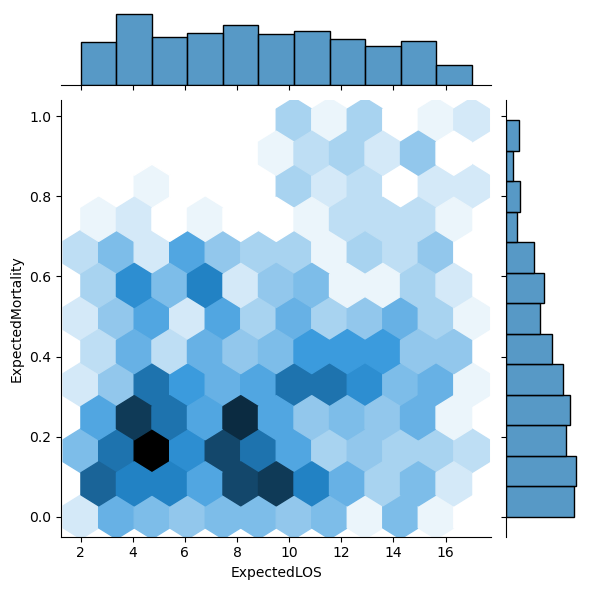

In [251]:
#40. Create a jointplot on expected mortality & expected length of stay.
#-----------------------------------------------------------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(x = "ExpectedLOS", y = "ExpectedMortality", kind = "hex", data = df5)
# show the plot
plt.show()
